In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('secondary_data.csv', sep=';')

In [3]:
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [97]:
df.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment             0
gill-spacing                0
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type                   0
veil-color              53656
has-ring                    0
ring-type                   0
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

# About dataset

In [5]:
# class
df['class'].value_counts()

p    33888
e    27181
Name: class, dtype: int64

In [7]:
# Changing class names to numbers e (edibile) to 1 and p (poisonous) to 0
df['class'] = df['class'].replace({'e': 1, 'p':0}).astype('int8')

## Cap

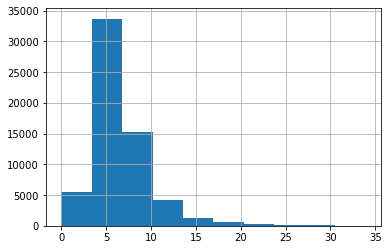

In [15]:
# 1 cap-diameter: float number in cm
df['cap-diameter'].hist()
plt.show()

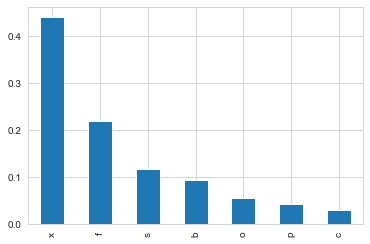

In [31]:
# 2 cap-shape: bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
sns.set_style('whitegrid')
df['cap-shape'].value_counts(normalize=True).plot(kind='bar')
plt.show()

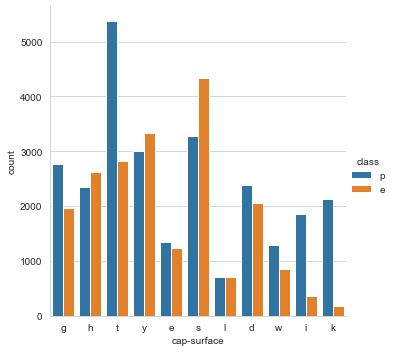

In [92]:
# 3 cap-surface: fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e
sns.catplot(x='cap-surface', data=df, kind='count', hue='class')
plt.show()

In [95]:
df['cap-surface'].isna().sum()

14120

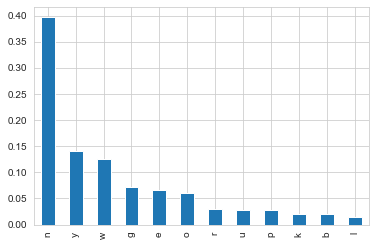

In [33]:
# 4 cap-color
# brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k, none=f
df['cap-color'].value_counts(normalize=True).plot(kind='bar')
plt.show()

## Gill

In [53]:
# 6 Gill-attachment
# adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f
set(df['gill-attachment'])

{'a', 'd', 'e', 'f', nan, 'p', 's', 'x'}

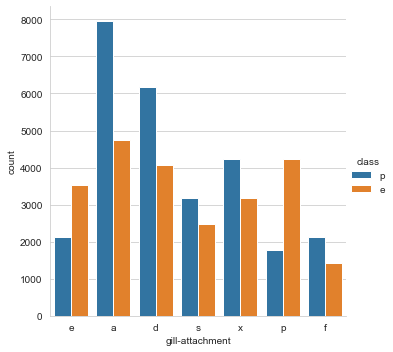

In [86]:
sns.catplot(x='gill-attachment', data=df, kind='count', hue='class')
plt.show()

In [57]:
df['gill-attachment'].isna().sum()

9884

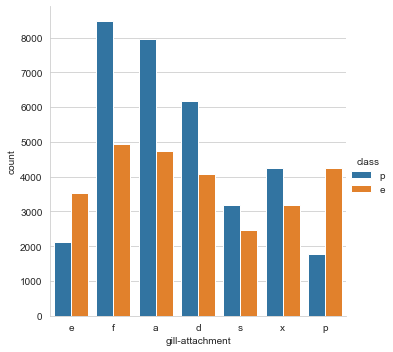

In [89]:
# changing Nan's to zeros and pelacing to none = f
df['gill-attachment'] = df['gill-attachment'].fillna(0).replace({0: 'f'})
sns.catplot(x='gill-attachment', data=df, kind='count', hue='class')
plt.show()

In [90]:
df['gill-attachment'].isna().sum()

0

In [55]:
# 7 Gill-spacing:  close=c, distant=d, none=f
set(df['gill-spacing'])

{'c', 'd', 'f', nan}

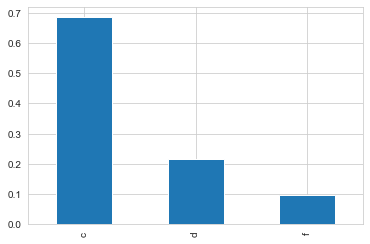

In [56]:
df['gill-spacing'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [58]:
df['gill-spacing'].isna().sum()

25063

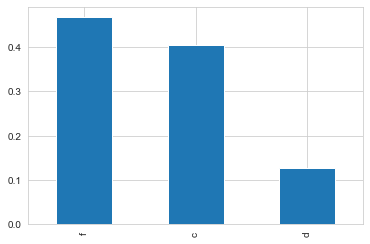

In [60]:
# changing Nan's to zeros and pelacing to none - f
df['gill-spacing'] = df['gill-spacing'].fillna(0).replace({0: 'f'})
df['gill-spacing'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [61]:
df['gill-spacing'].isna().sum()

0

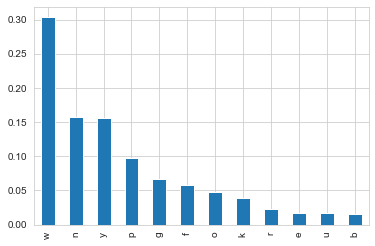

In [62]:
# 8 gill-color
# brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k, none=f
df['gill-color'].value_counts(normalize=True).plot(kind='bar')
plt.show()

## Stem

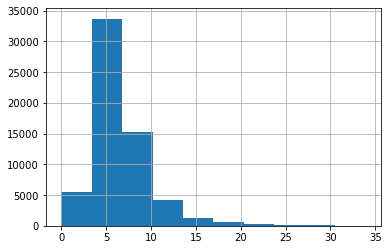

In [33]:
# 9 stem-height: float number in cm
df['stem-height'].hist()
plt.show()

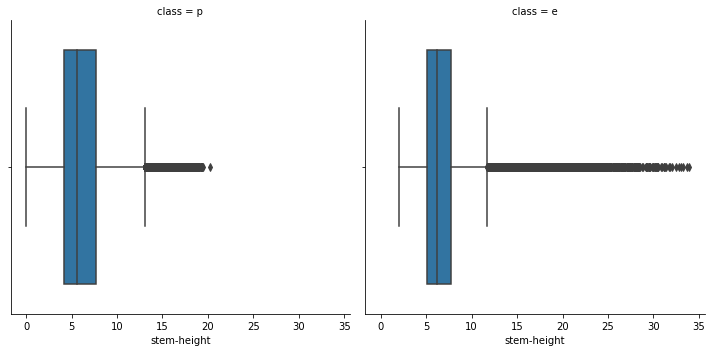

In [10]:
sns.catplot(data=df, x='stem-height', kind='box', col='class')
plt.show()

In [81]:
# 11 stem-root
print("{:.1%} are Nan values in this column".format(df['stem-root'].isna().sum() / len(df['stem-root'])))

84.4% are Nan values in this column


In [99]:
# 12 stem-surface
print("{:.1%} are Nan values in this column".format(df['stem-surface'].isna().sum() / len(df['stem-surface'])))

62.4% are Nan values in this column


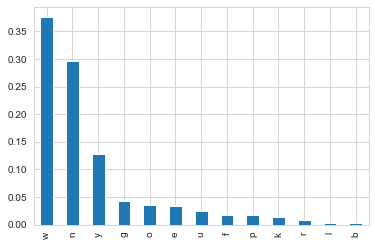

In [36]:
# 13 stem-color
# brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k, none=f
df['stem-color'].value_counts(normalize=True).plot(kind='bar')
plt.show()

## Veil

In [38]:
#14 veil-type:  partial=p, universal=u
df['veil-type'].value_counts()

u    3177
Name: veil-type, dtype: int64

In [39]:
# there are only values 'u'. Changing Nan to 0 and 'u' to 1
df['veil-type']=df['veil-type'].fillna(0)
df['veil-type'] = df['veil-type'].replace({'u': 1})

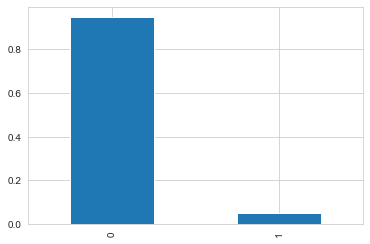

In [40]:
df['veil-type'].astype('int8')
df['veil-type'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [41]:
df.groupby('class')['veil-type'].value_counts()

class  veil-type
e      0            26122
       1             1059
p      0            31770
       1             2118
Name: veil-type, dtype: int64

In [79]:
#15 veil-color
print("{:.1%} are Nan values in this column".format(df['veil-color'].isna().sum() / len(df['veil-color'])))

87.9% are Nan values in this column


## Ring

In [24]:
#16 has-ring:  ring=t, none=f
df['has-ring'].value_counts()

f    45890
t    15179
Name: has-ring, dtype: int64

In [68]:
#17 ring-type
    # cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, 
    # sheathing=s, zone=z, scaly=y, movable=m, none=f
df['ring-type'].value_counts()

f    48361
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: ring-type, dtype: int64

In [66]:
df['ring-type'].isna().sum()

2471

In [69]:
# changing Nan's to zeros and pelacing to none - f
df['ring-type']=df['ring-type'].fillna(0).replace({0: 'f'})
df['ring-type'].isna().sum()

0

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             61069 non-null  int64  
 15  veil-color         

## Other

In [28]:
#5 does_bruise_or_bleed: bruises-or-bleeding=t,no=f
df['does-bruise-or-bleed'].value_counts()

f    50479
t    10590
Name: does-bruise-or-bleed, dtype: int64

In [78]:
#18 spore-print-color 
print("{:.1%} are Nan values in this column".format(df['spore-print-color'].isna().sum() / len(df['spore-print-color'])))

89.6% are Nan values in this column


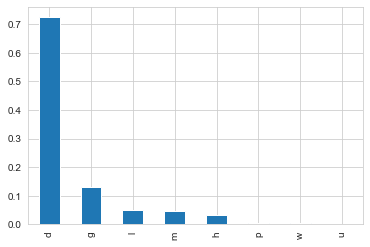

In [49]:
# 19 habitat: grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
df['habitat'].value_counts(normalize=True).plot(kind='bar')
plt.show()

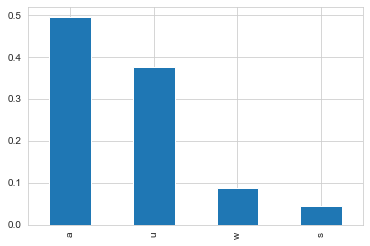

In [48]:
# 20 season: spring=s, summer=u, autumn=a, winter=w
df['season'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [ ]:
# usuwamy kolumnę stem_surface ze względu na małą licxzbę danych
# df.drop(['stem_root', 'veil_color','spore_print_color', stem_surface'?], axis=1, inplace=True)

<AxesSubplot:>

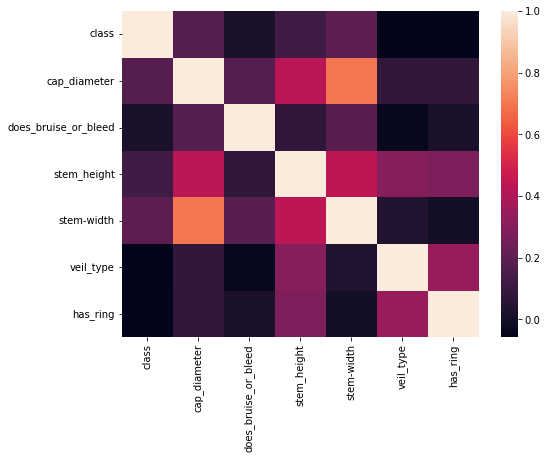

In [26]:
# korelacja dla kolumn o danych numerycznych
corr=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             61069 non-null  int64  
 15  veil-color         

In [33]:
class0=df[df['class']==0]
class0['stem_surface'].value_counts()

y    3361
i    2804
s    2478
g    1765
t    1412
k    1059
f    1059
h     535
Name: stem_surface, dtype: int64

In [34]:
class0=df[df['class']==1]
class0['stem_surface'].value_counts()

s    3547
i    1592
y    1579
t    1232
k     522
Name: stem_surface, dtype: int64

In [35]:
class0=df[df['class']==0]
class0['cap_surface'].value_counts()

t    5373
s    3270
y    3012
g    2760
d    2383
h    2357
k    2122
i    1856
e    1348
w    1288
l     706
Name: cap_surface, dtype: int64

In [36]:
class0=df[df['class']==1]
class0['cap_surface'].value_counts()

s    4338
y    3329
t    2823
h    2617
d    2049
g    1964
e    1236
w     862
l     706
i     369
k     181
Name: cap_surface, dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  float64
 1   cap_diameter          61069 non-null  float64
 2   cap_shape             61069 non-null  object 
 3   cap_surface           46949 non-null  object 
 4   cap_color             61069 non-null  object 
 5   does_bruise_or_bleed  61069 non-null  float64
 6   gill_attachment       51185 non-null  object 
 7   gill_spacing          61069 non-null  object 
 8   gill_color            61069 non-null  object 
 9   stem_height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-color            61069 non-null  object 
 12  veil_type             61069 non-null  float64
 13  has_ring              61069 non-null  float64
 14  ring_type             61069 non-null  object 
 15  habitat            

In [47]:
# Po usunięciu reszty Nan uzyskujemy tabelę:
dfg=df.dropna()

In [48]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38830 entries, 0 to 61068
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 38830 non-null  float64
 1   cap_diameter          38830 non-null  float64
 2   cap_shape             38830 non-null  object 
 3   cap_surface           38830 non-null  object 
 4   cap_color             38830 non-null  object 
 5   does_bruise_or_bleed  38830 non-null  float64
 6   gill_attachment       38830 non-null  object 
 7   gill_spacing          38830 non-null  object 
 8   gill_color            38830 non-null  object 
 9   stem_height           38830 non-null  float64
 10  stem-width            38830 non-null  float64
 11  stem-color            38830 non-null  object 
 12  veil_type             38830 non-null  float64
 13  has_ring              38830 non-null  float64
 14  ring_type             38830 non-null  object 
 15  habitat            

In [49]:
# zamiana 10 kolumn o typie float64 na 0/1
dfh=df.dropna(subset=['cap_surface'])

In [111]:
dfh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46949 entries, 0 to 61068
Data columns (total 89 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 46949 non-null  float64
 1   cap_diameter          46949 non-null  float64
 2   does_bruise_or_bleed  46949 non-null  float64
 3   stem_height           46949 non-null  float64
 4   stem-width            46949 non-null  float64
 5   veil_type             46949 non-null  float64
 6   has_ring              46949 non-null  float64
 7   b                     38830 non-null  float64
 8   e                     38830 non-null  float64
 9   g                     38830 non-null  float64
 10  k                     38830 non-null  float64
 11  l                     38830 non-null  float64
 12  n                     38830 non-null  float64
 13  o                     38830 non-null  float64
 14  p                     38830 non-null  float64
 15  r                  

In [112]:
dfi=dfh.dropna(subset=['b'])

In [113]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38830 entries, 0 to 61068
Data columns (total 89 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 38830 non-null  float64
 1   cap_diameter          38830 non-null  float64
 2   does_bruise_or_bleed  38830 non-null  float64
 3   stem_height           38830 non-null  float64
 4   stem-width            38830 non-null  float64
 5   veil_type             38830 non-null  float64
 6   has_ring              38830 non-null  float64
 7   b                     38830 non-null  float64
 8   e                     38830 non-null  float64
 9   g                     38830 non-null  float64
 10  k                     38830 non-null  float64
 11  l                     38830 non-null  float64
 12  n                     38830 non-null  float64
 13  o                     38830 non-null  float64
 14  p                     38830 non-null  float64
 15  r                  

## Regresja logistyczna

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [115]:
y=dfi.pop('class')
X=dfi

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [117]:
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [118]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [119]:
from sklearn.metrics import confusion_matrix, classification_report

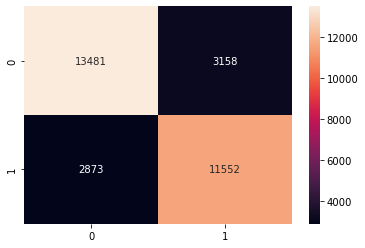

In [120]:
cm_train=confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.show()

In [121]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      4188
         1.0       0.79      0.81      0.80      3578

    accuracy                           0.82      7766
   macro avg       0.81      0.81      0.81      7766
weighted avg       0.82      0.82      0.82      7766



### Krzywa ROC

In [123]:
from sklearn.metrics import roc_curve, roc_auc_score

In [124]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_test)

In [125]:
fpr

array([0.        , 0.17884432, 1.        ])

In [126]:
tpr

array([0.        , 0.80855226, 1.        ])

In [127]:
thresholds

array([2., 1., 0.])

In [128]:
auc=roc_auc_score(y_test, y_pred_test)

In [129]:
print('AUC: %.3f' % auc)

AUC: 0.815


In [130]:
help_prob=[0 for _ in range(len(y_test))]

In [131]:
help_fpr, help_tpr, _=roc_curve(y_test, help_prob)

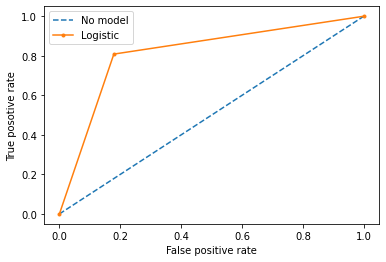

In [132]:
plt.plot(help_fpr, help_tpr, linestyle='--', label='No model')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.xlabel('False positive rate')
plt.ylabel('True posotive rate')
plt.legend()
plt.show()

In [133]:
# model2
model2=LogisticRegression(max_iter=50)
model2.fit(X_train, y_train)
y_pred2=model2.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [134]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82      4188
         1.0       0.79      0.79      0.79      3578

    accuracy                           0.81      7766
   macro avg       0.81      0.81      0.81      7766
weighted avg       0.81      0.81      0.81      7766



In [135]:
# model3
model3=LogisticRegression(max_iter=150)
model3.fit(X_train, y_train)
y_pred3=model3.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [136]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      4188
         1.0       0.80      0.80      0.80      3578

    accuracy                           0.82      7766
   macro avg       0.82      0.82      0.82      7766
weighted avg       0.82      0.82      0.82      7766



In [137]:
model4=LogisticRegression(solver='liblinear', penalty='l1')
model4.fit(X_train, y_train)
y_pred4=model4.predict(X_test)

In [138]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

         0.0       0.83      0.82      0.83      4188
         1.0       0.80      0.80      0.80      3578

    accuracy                           0.81      7766
   macro avg       0.81      0.81      0.81      7766
weighted avg       0.81      0.81      0.81      7766



In [139]:
model5=LogisticRegression(solver='saga', penalty='l1')
model5.fit(X_train, y_train)
y_pred5=model5.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [140]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      4188
         1.0       0.79      0.79      0.79      3578

    accuracy                           0.80      7766
   macro avg       0.80      0.80      0.80      7766
weighted avg       0.80      0.80      0.80      7766



In [141]:
model6=LogisticRegression(class_weight='balanced')
model6.fit(X_train, y_train)
y_pred6=model6.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [142]:
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83      4188
         1.0       0.79      0.83      0.81      3578

    accuracy                           0.82      7766
   macro avg       0.82      0.82      0.82      7766
weighted avg       0.82      0.82      0.82      7766



## KNN k najbliższych sąsiadów

In [143]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn=knn.predict(X_test)

In [145]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4188
         1.0       1.00      1.00      1.00      3578

    accuracy                           1.00      7766
   macro avg       1.00      1.00      1.00      7766
weighted avg       1.00      1.00      1.00      7766



In [146]:
knn2=KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn2.fit(X_train, y_train)
pred_knn2=knn2.predict(X_test)

In [147]:
print(classification_report(y_test, pred_knn2))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      4188
         1.0       0.93      0.93      0.93      3578

    accuracy                           0.93      7766
   macro avg       0.93      0.93      0.93      7766
weighted avg       0.93      0.93      0.93      7766



In [148]:
knn3=KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn3.fit(X_train, y_train)
pred_knn3=knn3.predict(X_test)

In [149]:
print(classification_report(y_test, pred_knn3))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4188
         1.0       1.00      1.00      1.00      3578

    accuracy                           1.00      7766
   macro avg       1.00      1.00      1.00      7766
weighted avg       1.00      1.00      1.00      7766



In [150]:
knn4=KNeighborsClassifier(n_neighbors=7, metric='euclidean', weights='distance')
knn4.fit(X_train, y_train)
pred_knn4=knn4.predict(X_test)

In [151]:
print(classification_report(y_test, pred_knn4))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4188
         1.0       1.00      1.00      1.00      3578

    accuracy                           1.00      7766
   macro avg       1.00      1.00      1.00      7766
weighted avg       1.00      1.00      1.00      7766



## Drzewo decyzyjne

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [153]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_dt=dt.predict(X_test)

In [154]:
print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4188
         1.0       1.00      1.00      1.00      3578

    accuracy                           1.00      7766
   macro avg       1.00      1.00      1.00      7766
weighted avg       1.00      1.00      1.00      7766



In [165]:
dt.get_depth()

16

In [166]:
dt.get_n_leaves()

119

In [155]:
dt2=DecisionTreeClassifier(criterion='entropy')
dt2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [156]:
y_dt2=dt2.predict(X_test)

In [157]:
print(classification_report(y_test,y_dt2))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4188
         1.0       1.00      1.00      1.00      3578

    accuracy                           1.00      7766
   macro avg       1.00      1.00      1.00      7766
weighted avg       1.00      1.00      1.00      7766



## Naiwny klasyfikator Bayesowski

In [161]:
from sklearn.naive_bayes import MultinomialNB

In [162]:
mnb=MultinomialNB()
mnb.fit(X_train, y_train)
y_mnb=mnb.predict(X_test)

In [163]:
print(classification_report(y_test,y_mnb))

              precision    recall  f1-score   support

         0.0       0.76      0.78      0.77      4188
         1.0       0.74      0.72      0.73      3578

    accuracy                           0.75      7766
   macro avg       0.75      0.75      0.75      7766
weighted avg       0.75      0.75      0.75      7766



## Boosting

In [167]:
from sklearn.ensemble import AdaBoostClassifier

In [168]:
ada=AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [169]:
y_pred_ada=ada.predict(X_test)

In [170]:
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      4188
         1.0       0.80      0.83      0.82      3578

    accuracy                           0.83      7766
   macro avg       0.83      0.83      0.83      7766
weighted avg       0.83      0.83      0.83      7766



## SVM

In [171]:
from sklearn.svm import SVC

In [172]:
svm1=SVC(C=1, kernel='rbf')
svm1.fit(X,y)
pred_svm1=svm1.predict(X)

In [173]:
print(classification_report(y, pred_svm1))

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     20827
         1.0       0.96      0.93      0.95     18003

    accuracy                           0.95     38830
   macro avg       0.95      0.95      0.95     38830
weighted avg       0.95      0.95      0.95     38830



In [ ]:
# Podsumowując:
   # modele przetrenowane: drzewo decyzyjne, k najbliższych sąsiadów, SVM (95% ?)
   # AdaBoosting  0,83, regresja logistyczna 0,82, naiwny Bayes 0,75,